## M. RIZKY MAFAZAN (16)
## 2141720140


## Tugas Praktikum
### Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets variabel yang dapat digunakan dan variabel yang tidak dapat digunakan.

## Intruksi Umum
1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.
2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.


In [4]:
# import package
import numpy as np
import pandas as pd

# baca data
data = pd.read_csv('insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


---
## **Multiple Linear Regression**

### 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

**Variabel Bebas (Fitur)**

1. Age (Usia) : faktor yang dapat memengaruhi biaya medis seseorang karena biaya perawatan medis biasanya cenderung meningkat seiring bertambahnya usia.

2. Sex (Jenis Kelamin) : Jenis kelamin bisa menjadi fitur, meskipun pengaruhnya mungkin tidak sebesar faktor-faktor lainnya.

3. BMI (Body Mass Index) : Indeks massa tubuh adalah ukuran yang mencerminkan komposisi tubuh seseorang.

4. Children (Jumlah Anak) : Jumlah anak dalam keluarga dapat memengaruhi biaya medis

5. Smoker (Perokok) : Status perokok atau bukan bisa memengaruhi biaya medis.

6. Region (Wilayah) : Wilayah geografis tempat seseorang tinggal juga bisa memengaruhi biaya medis

**Variabel Target**

1. Charges (Biaya Medis Personal) : variabel yang ingin diprediksi atau dianalisis

In [5]:
# Identifikasi variabel bebas (fitur) dan variabel target:
# Ukuran dari data
data.shape

# Info data
data.info()

# Deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1. data.shape: Perintah ini digunakan untuk mendapatkan dimensi (jumlah baris dan kolom) dari DataFrame data. Hasilnya akan memberikan informasi tentang ukuran data.

2. data.info(): Ini memberikan informasi tambahan tentang dataset seperti tipe data, jumlah nilai non-null, dan penggunaan memori. Berguna untuk memeriksa apakah ada nilai yang hilang dalam dataset.

3. data.describe(): Perintah ini memberikan statistik deskriptif untuk setiap kolom numerik dalam dataset seperti rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum. Berguna untuk mendapatkan pemahaman awal tentang distribusi data.

---
### 2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Memproses data terlebih dahulu, misalnya mengkodekan variabel 'perokok'
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

# Pilih variabel independen dan variabel target
X = data[['age', 'bmi', 'children', 'smoker']]
y = data['charges']

# Pisahkan data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. from sklearn.linear_model import LinearRegression: Kode ini mengimpor kelas LinearRegression dari pustaka Scikit-Learn (sklearn), yang akan digunakan untuk membangun model regresi linear.

2. from sklearn.model_selection import train_test_split: Kode ini mengimpor fungsi train_test_split dari Scikit-Learn. Fungsi ini digunakan untuk membagi dataset menjadi dua bagian, yaitu set pelatihan dan set pengujian.

3. from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error: Kode ini mengimpor beberapa metrik evaluasi yang akan digunakan untuk mengukur kinerja model regresi linear, seperti mean squared error (MSE), R-squared (R2), dan mean absolute error (MAE).

4. data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0}): Kode ini mengubah variabel 'smoker' yang berisi nilai 'yes' dan 'no' menjadi nilai biner, yaitu 1 untuk 'yes' dan 0 untuk 'no'. Ini diperlukan karena model regresi linear membutuhkan input numerik.

5. X = data[['age', 'bmi', 'children', 'smoker']] dan y = data['charges']: Kode ini memilih variabel independen (X) dan variabel target (y) dari DataFrame data. Variabel independen terdiri dari 'age' (usia), 'bmi' (Body Mass Index), 'children' (jumlah anak), dan 'smoker' (apakah seseorang perokok atau bukan). Variabel target adalah 'charges' (biaya asuransi).

6. X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): Kode ini membagi data menjadi set pelatihan (X_train dan y_train) dan set pengujian (X_test dan y_test). Pengujian dilakukan dengan mengambil 20% data sebagai set pengujian, dan argumen random_state digunakan untuk memastikan hasil pengujian yang konsisten jika kode dijalankan ulang. Set pelatihan akan digunakan untuk melatih model, sedangkan set pengujian akan digunakan untuk menguji kinerja model.

---
### 3. Lakukan feature scaling jika diperkukan.

Feature scaling menggunakan StandardScaler dari library sklear, preprocessing. Melakukan scaling pada data numerik tunggal (X dan y) yang kemungkinan besar adalah salah satu fitur atau target dalam analisis regresi. Dalam kasus ini, dataset insurance, tidak ada variabel yang disebut X atau y.

---
### 4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [ ]:
# Membuat dan melatih model regresi linier berganda
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

1. model = LinearRegression(): Kode ini membuat objek model regresi linear dengan menggunakan kelas LinearRegression yang telah diimpor sebelumnya dari Scikit-Learn. Objek model ini akan digunakan untuk mempelajari hubungan antara variabel independen (X_train) dan variabel target (y_train) dalam data pelatihan.

2. model.fit(X_train, y_train): Kode ini melatih model regresi linear menggunakan data pelatihan (X_train adalah variabel independen, dan y_train adalah variabel target). Proses pelatihan ini melibatkan pencarian koefisien (bobot) yang optimal untuk setiap variabel independen agar model dapat memprediksi y_train dengan baik. Dalam hal ini, model akan mencoba memahami hubungan antara usia (age), Body Mass Index (bmi), jumlah anak (children), dan status perokok (smoker) dengan biaya asuransi (charges).

---
### 5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [ ]:
# Buatlah prediksi pada set tes
y_pred = model.predict(X_test)

y_pred = model.predict(X_test): Kode ini memanggil metode predict() pada objek model model. Metode ini digunakan untuk membuat prediksi berdasarkan variabel independen yang diberikan sebagai argumen, dalam hal ini X_test. Hasil prediksi akan disimpan dalam variabel y_pred.

---
### 6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

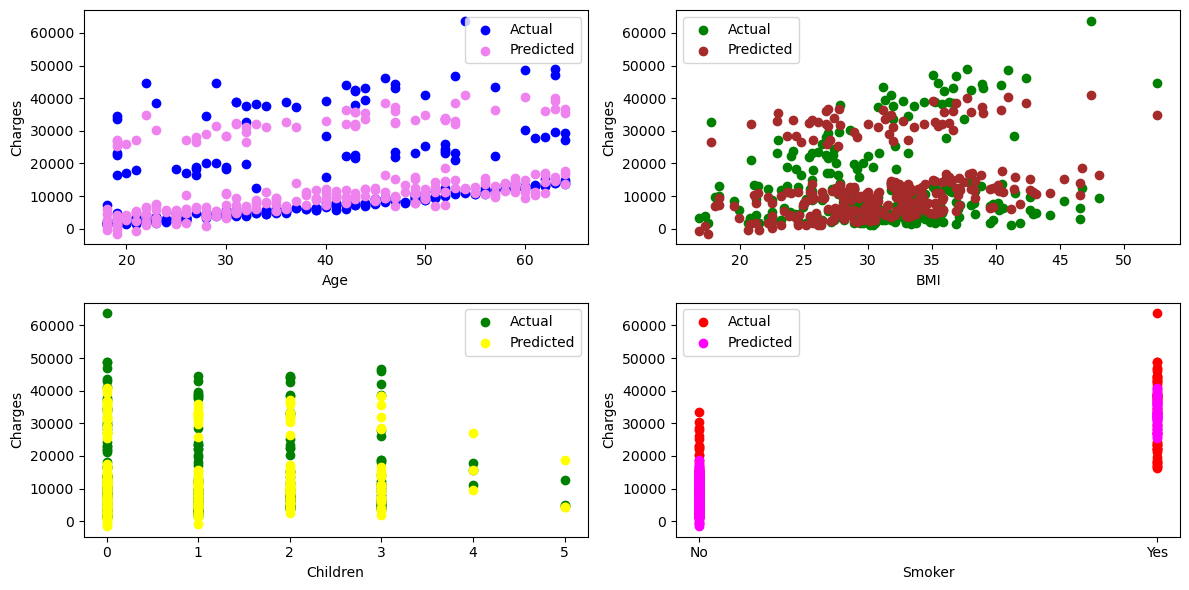

Mean Squared Error (MSE): 33981653.95019776
R-squared: 0.7811147722517886
Mean Absolute Error (MAE): 4213.798594527248


In [ ]:
# Evaluasi kinerja model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


# Visualisasi hasil
plt.figure(figsize=(12, 6))

# Sebar plot untuk 'usia' vs. 'biaya'
plt.subplot(2, 2, 1)
plt.scatter(X_test['age'], y_test, color='blue', label='Actual')
plt.scatter(X_test['age'], y_pred, color='violet', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()

# Sebar plot untuk 'bmi' vs. 'biaya'
plt.subplot(2, 2, 2)
plt.scatter(X_test['bmi'], y_test, color='green', label='Actual')
plt.scatter(X_test['bmi'], y_pred, color='brown', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()

# Sebar plot untuk 'children' vs. 'charges'
plt.subplot(2, 2, 3)
plt.scatter(X_test['children'], y_test, color='green', label='Actual')
plt.scatter(X_test['children'], y_pred, color='yellow', label='Predicted')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.legend()

# Sebar plot untuk 'smoker' vs. 'charges'
plt.subplot(2, 2, 4)
plt.scatter(X_test['smoker'], y_test, color='red', label='Actual')
plt.scatter(X_test['smoker'], y_pred, color='magenta', label='Predicted')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend()

# Tampilkan semua plot
plt.tight_layout()
plt.show()
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

1. mse = mean_squared_error(y_test, y_pred): Kode ini menggunakan fungsi mean_squared_error dari Scikit-Learn untuk menghitung Mean Squared Error (MSE) antara nilai yang sebenarnya (y_test) dan hasil prediksi (y_pred). MSE mengukur seberapa baik model memprediksi variabel target dengan mengukur rata-rata kuadrat perbedaan antara nilai sebenarnya dan nilai prediksi. Semakin rendah MSE, semakin baik kinerja model.

2. r2 = r2_score(y_test, y_pred): Kode ini menggunakan fungsi r2_score dari Scikit-Learn untuk menghitung R-squared (R2) antara nilai sebenarnya (y_test) dan hasil prediksi (y_pred). R2 mengukur seberapa baik model sesuai dengan data. Nilai R2 berkisar antara 0 dan 1, dan semakin mendekati 1, semakin baik modelnya.

3. mae = mean_absolute_error(y_test, y_pred): Kode ini menggunakan fungsi mean_absolute_error dari Scikit-Learn untuk menghitung Mean Absolute Error (MAE) antara nilai sebenarnya (y_test) dan hasil prediksi (y_pred). MAE mengukur rata-rata dari nilai absolut perbedaan antara nilai sebenarnya dan nilai prediksi. Semakin rendah MAE, semakin baik model.

4. Selanjutnya, kode melakukan visualisasi hasil prediksi dengan menggunakan matplotlib. Ini termasuk empat scatter plot yang membandingkan variabel independen ('age', 'bmi', 'children', 'smoker') dengan variabel target ('charges') untuk data aktual (warna biru) dan hasil prediksi (warna ungu atau kuning, tergantung dari plot mana). Setiap subplot menunjukkan hubungan antara satu variabel independen dengan variabel target.

5. Terakhir, kode mencetak nilai MSE, R2, dan MAE ke layar. Ini memberikan gambaran tentang kinerja model dalam memprediksi biaya asuransi berdasarkan variabel independen yang dipilih. Semakin rendah MSE dan MAE, dan semakin tinggi R2, semakin baik kinerja modelnya.